# On importe les packages et le dataset que nous utiliserons dans ce tutoriel.

In [7]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

wine_dataset = datasets.load_wine()

# Exploration et visualisation des données

In [8]:
print(wine_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [9]:
# les features
print("Features: ", wine_dataset.feature_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [12]:
#les labels
print("Labels: ", wine_dataset.target_names)

Labels:  ['class_0' 'class_1' 'class_2']


# transformons tout ça en un dataFrame Pandas.

In [14]:
wine_dataframe = pd.DataFrame(data=wine_dataset['data'],columns=wine_dataset['feature_names'])
#On ajoute la colonne target ensuite
wine_dataframe['target'] = wine_dataset['target']
# Puis le nom des targets
wine_dataframe['class']=wine_dataframe['target'].map(lambda target_name: wine_dataset['target_names'][target_name])

# visualiser le dataFrame que nous venons de créer.

In [13]:
wine_dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Création de notre modèle SVM

In [15]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = \
    train_test_split(wine_dataset['data'],wine_dataset['target'],
                     test_size=0.2)

# transformer les données dans une représentation spécifique al'aide d'un kernel linéaire

In [16]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



# crée une carte thermique qui représente la matrice de confusion :

<AxesSubplot:>

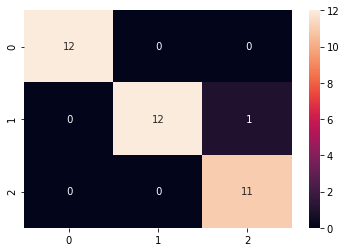

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')